In [17]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np
from PyAstronomy import pyasl
from matplotlib.gridspec import GridSpec

## Orbital Doppler

<IPython.core.display.Javascript object>


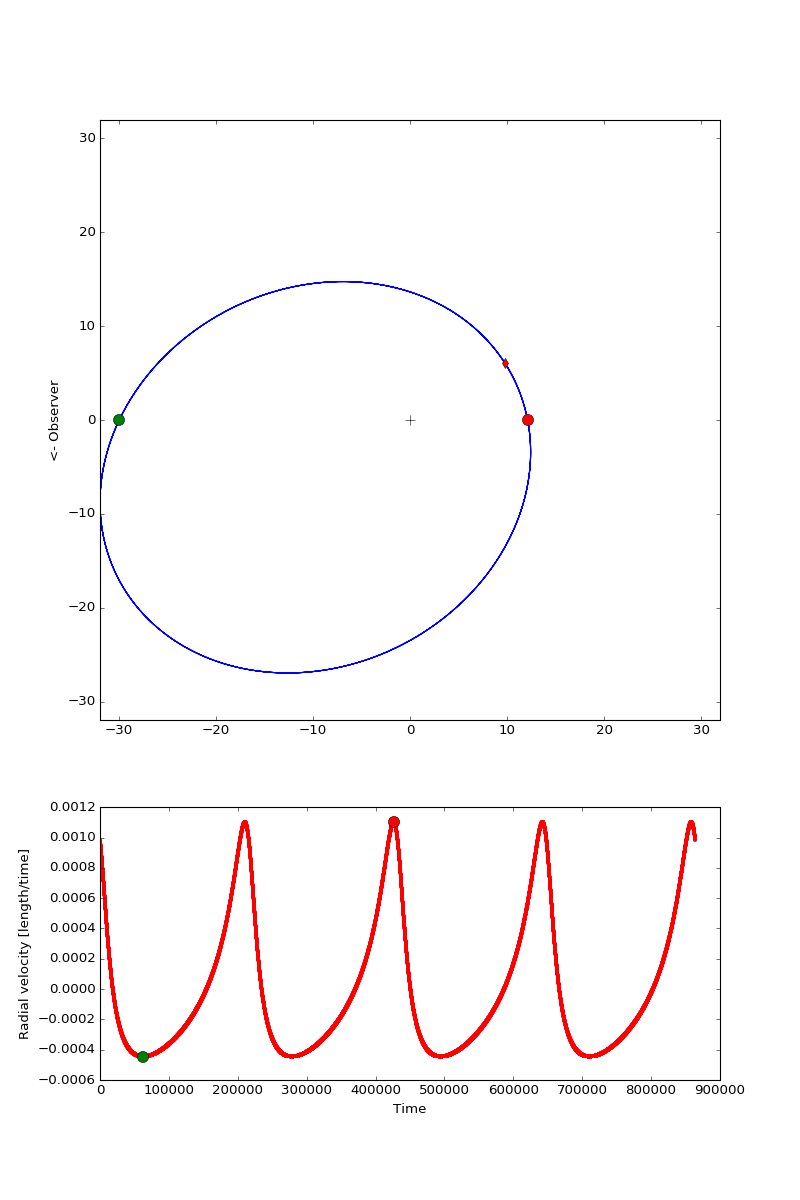

In [80]:
omega = 32
ecc = 0.5

T0 = 0
Porb = 2.5
aSini = 23
inclination = 0

p_spin = 1.37

c = 3e10

ke = pyasl.KeplerEllipse(aSini, Porb * 86400, e=ecc, Omega=0, i=inclination, w=omega)

t = np.arange(0, 10, 0.001) * 86400
pos = ke.xyzPos(t)
radius = ke.radius(t)
# Radial velocity
vel = ke.xyzVel(t)

tminvel = t[np.argmin(vel[::,1])]
tmaxvel = t[np.argmax(vel[::,1])]
velmin = vel[::,1][np.argmin(vel[::,1])]
velmax = vel[::,1][np.argmax(vel[::,1])]
# Find the nodes of the orbit (Observer at -z)

posmin = ke.xyzPos(tminvel)
posmax = ke.xyzPos(tmaxvel)

# ascn, descn = ke.xyzNodes_LOSZ()

# Plot x and y coordinates of the orbit
plt.figure(figsize=(10, 15))
gs = GridSpec(2, 1, height_ratios=(11, 5))
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
# plt.title("Periapsis (red diamond), Asc. node (green circle), desc. node (red circle)")
ax0.set_ylabel("<- Observer")
ax0.plot([0], [0], 'k+', markersize=9)
ax0.plot(pos[::,0], pos[::,1], 'b-')

ax0.scatter(posmin[0], posmin[1])
ax0.scatter(posmax[0], posmax[1])
# Point of periapsis
ax0.plot([pos[0,0]], [pos[0,1]], 'rd')
# Nodes of the orbit
ax0.plot([posmin[0]], [posmin[1]], 'go', markersize=10)
ax0.plot([posmax[0]], [posmax[1]], 'ro', markersize=10)

plot_dim = np.max(np.abs(pos))
ax0.set_xlim([-plot_dim, plot_dim])
ax0.set_ylim([-plot_dim, plot_dim])
# Plot RV
ax1.set_xlabel("Time")
ax1.set_ylabel("Radial velocity [length/time]")
ax1.plot(t, vel[::,1], 'r.-')
ax1.plot([tminvel], [velmin], 'go', markersize=10)
ax1.plot([tmaxvel], [velmax], 'ro', markersize=10)
plt.show()